# 2. Import Pustaka yang Dibutuhkan

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

# 3. Data Loading

## 3.1 Read Dataframe dari Source CSV
Memasukkan data berupa dataset kartu kredit untuk *clustering* sumber eksternal untuk memungkinkan akses dan pengolahan data secara efisien dalam sistem atau program.

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/januwarby/PYTN_KampusMerdeka_fp4_JanuwarByKhaqi/master/CC%20GENERAL.csv')

In [ ]:
df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


## 3.2 Menampilkan 5 Data Teratas

In [ ]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


Analisis
Dataset ini berisi 9000 pengguna kartu kredit sebanyak 9000 orang selama 6 bulan. Dataset ini memiliki atribut sebagai berikut:


1. CUSTID - Identification of Credit Card holder (Categorical)
2. BALANCE - Balance amount left in their account to make purchases
3. BALANCEFREQUENCY - How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)
4. PURCHASES - Amount of purchases made from account
5. ONEOFFPURCHASES - Maximum purchase amount done in one-go
6. INSTALLMENTSPURCHASES - Amount of purchase done in installment
7. CASHADVANCE - Cash in advance given by the user
8. PURCHASESFREQUENCY - How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
9. ONEOFFPURCHASESFREQUENCY - How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)
10. PURCHASESINSTALLMENTSFREQUENCY - How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)
11. CASHADVANCEFREQUENCY - How frequently the cash in advance being paid
12. CASHADVANCETRX - Number of Transactions made with "Cash in Advance"
13. PURCHASESTRX - Number of purchase transactions made
14. CREDITLIMIT - Limit of Credit Card for user
15. PAYMENTS - Amount of Payment done by user
16. MINIMUM_PAYMENTS - Minimum amount of payments made by user
17. PRCFULLPAYMENT - Percent of full payment paid by user
18. TENURE - Tenure of credit card service for user





## 3.3 Menampilkan Informasi Umum dari Data Frame

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

Dari proses di atas didapatkan informasi mengenai seluruh variabel yang terdapat pada data frame Credit Card Dataset for Clustering yang berjumlah 18 variabel dengan tipe data float dan integer.

## 3.4 Melihat Ukuran DataFrame



In [ ]:
df.shape

(8950, 18)

## 3.5 Melihat Statistik DataFrame Secara Umum



In [ ]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


Dari proses di atas didapatkan informasi mengenai statistik deskriptif seluruh variabel pada DataFrame Credit Card Dataset for Clustering.

# Exploratory Data Analysis

In [ ]:
df_eda = df.copy()
df_eda

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


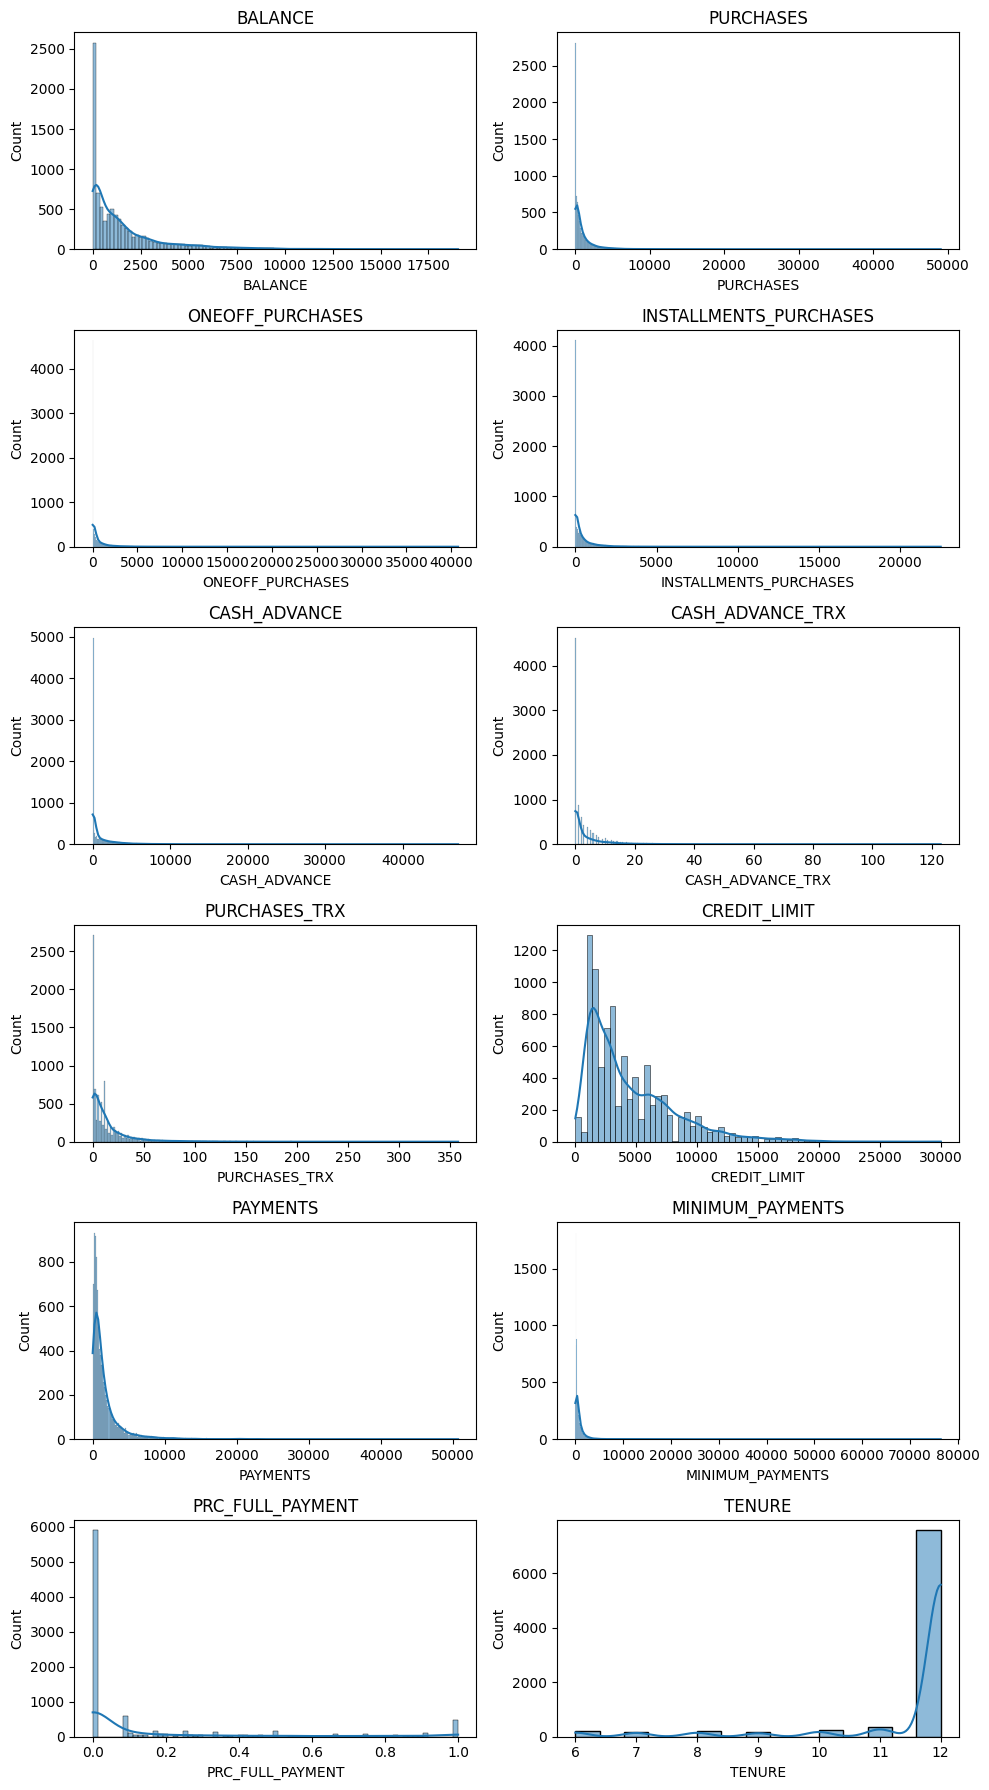

In [ ]:
df_num_columns = ['BALANCE','PURCHASES','ONEOFF_PURCHASES','INSTALLMENTS_PURCHASES','CASH_ADVANCE','CASH_ADVANCE_TRX','PURCHASES_TRX','CREDIT_LIMIT','PAYMENTS','MINIMUM_PAYMENTS','PRC_FULL_PAYMENT','TENURE']


#Membuat plot distribusi feature numeric
k = len(df_num_columns)
n = 2
m = (k - 1) // n + 1
fig, axes = plt.subplots(m, n, figsize=(n * 5, m * 3))
for i, (name, col) in enumerate(df[df_num_columns].iteritems()):
    r, c = i // n, i % n
    ax = axes[r, c]
    sns.histplot(col,kde=True,ax=ax)
    ax.set_title(name)
fig.tight_layout()

Dari informasi diatas dapat disimpulkan bahwa :

1. Customer memiliki balance rata-rata 2.072 dengan range 0-18.495. Balance customer tidak terdistribusi merata (cenderung dibawah 2000)
2. Customer memiliki rata-rata total pembelian 1.003 dengan range 0-41.050. Total pembelian dari setiap akun tidak terdistribusi merata (cenderung dibawah 1.102)
3. Customer yang melakukan pembelian dalam 1x pembayaran memiliki rata-rata maximum value 596 dengan range 0-40.624. Maksimum Value pembelian dalam 1x terdistribusi tidak merata (cenderung dibawah 575)
Cicilan customer memiliki rata-rata 407 dengan range 0-14.686. Cicilan customer tidak terdistribusi merata (cenderung dibawah 455)
4. Cash Advanced yang dilakukan customer memiliki rata-rata 984 dengan range 0-47.137. Cash advanced yang dilakukan customer tidak merata (cenderung dibawah 1.138)
5. Jumlah transaksi dengan metode cash advanced pada setiap akun memiliki rata-rata 3 dengan range 0-123
6. Jumlah transaksi metode cash advanced pada setiap akun tidak merata (cenderung dibawah 4 transaksi)
7. Jumlah transaksi pada setiap akun memiliki rata-rata 14 dengan range 0-347. Jumlah transaksi pada setiap akun tidak merata (cenderung dibawah 17 transaksi)
8. Customer memiliki limit credit rata-rata 4.494 dengan range 50-30.000. Limit credit customer tidak merata (cenderung dibawah 4.000)
9. Total payment customer memiliki rata-rata 1.740 dengan range 0-50.721. Total payment customer tidak merata (cenderung dibawah 800)
10. Minimum payment customer memiliki rata-rata 874 dengan range 0-76.406. Minimum payment customer tidak merata (cenderung dibawah 800)
11. Persentase full payment customer memiliki rata-rata 0.1 dengan range 0-1. Persentase full payment customer tidak merata (cenderung dibawah 0.12)
12. Tenure customer memiliki rata-rata 11.5 dengan range 6-12. Tenure tidak merata (terpisat pada 12)

In [ ]:
eda = df_eda[['PURCHASES', 'TENURE']]
eda = eda.groupby('TENURE').agg(MIN=('PURCHASES', 'min'), AVG=('PURCHASES', 'mean'), MAX=('PURCHASES', 'max')).reset_index()


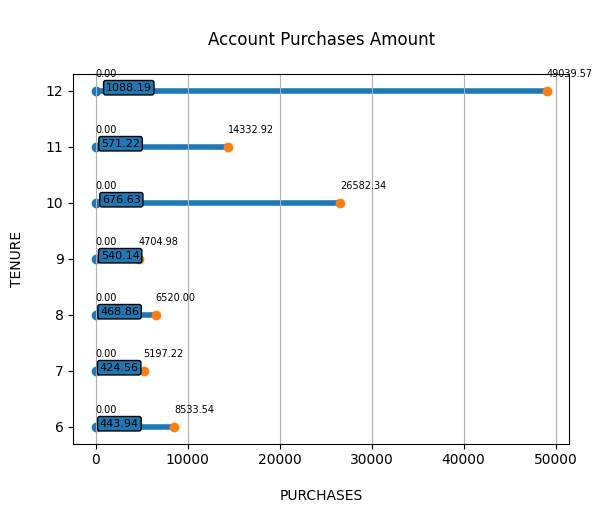

In [ ]:
tenure = sorted(df['TENURE'].unique())
min_sct = plt.scatter(x=eda['MIN'], y=eda['TENURE'])
max_sct = plt.scatter(x=eda['MAX'], y=eda['TENURE'])
for i in range(len(tenure)):
    eda_x = eda[eda['TENURE']==tenure[i]]
    plt.hlines(y=eda_x['TENURE'], xmin=eda_x['MIN'], xmax=eda_x['MAX'], linewidth=4, zorder=0)
    plt.annotate('{0:.2f}'.format(eda_x['MIN'].values[0]), xy=(eda_x['MIN'].values[0], eda_x['TENURE'].values[0]+0.25), fontsize=7)
    plt.annotate('{0:.2f}'.format(eda_x['AVG'].values[0]), xy=(eda_x['AVG'].values[0], eda_x['TENURE'].values[0]), fontsize=8, bbox=dict(boxstyle='round', pad=0.2))
    plt.annotate('{0:.2f}'.format(eda_x['MAX'].values[0]), xy=(eda_x['MAX'].values[0], eda_x['TENURE'].values[0]+0.25), fontsize=7)
#for spine in axs_left.spines.values():
#    spine.set_color('None')
plt.xlabel('\nPURCHASES')
plt.ylabel('TENURE\n')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', alpha=0)
plt.grid(axis='x', which='major')
plt.title('\nAccount Purchases Amount\n')
plt.show()

Berdasarkan chart di atas, didapatkan jika pengguna kartu kredit dengan jangka waktu pembayaran layanan kartu kredit (TENURE) selama 12 bulan lebih memilih untuk melakukan pembelian dalam jumlah besar dibandingkan dengan pengguna yang memiilih jangka angka waktu pembayaran layanan kartu kredit (TENURE) lainnya

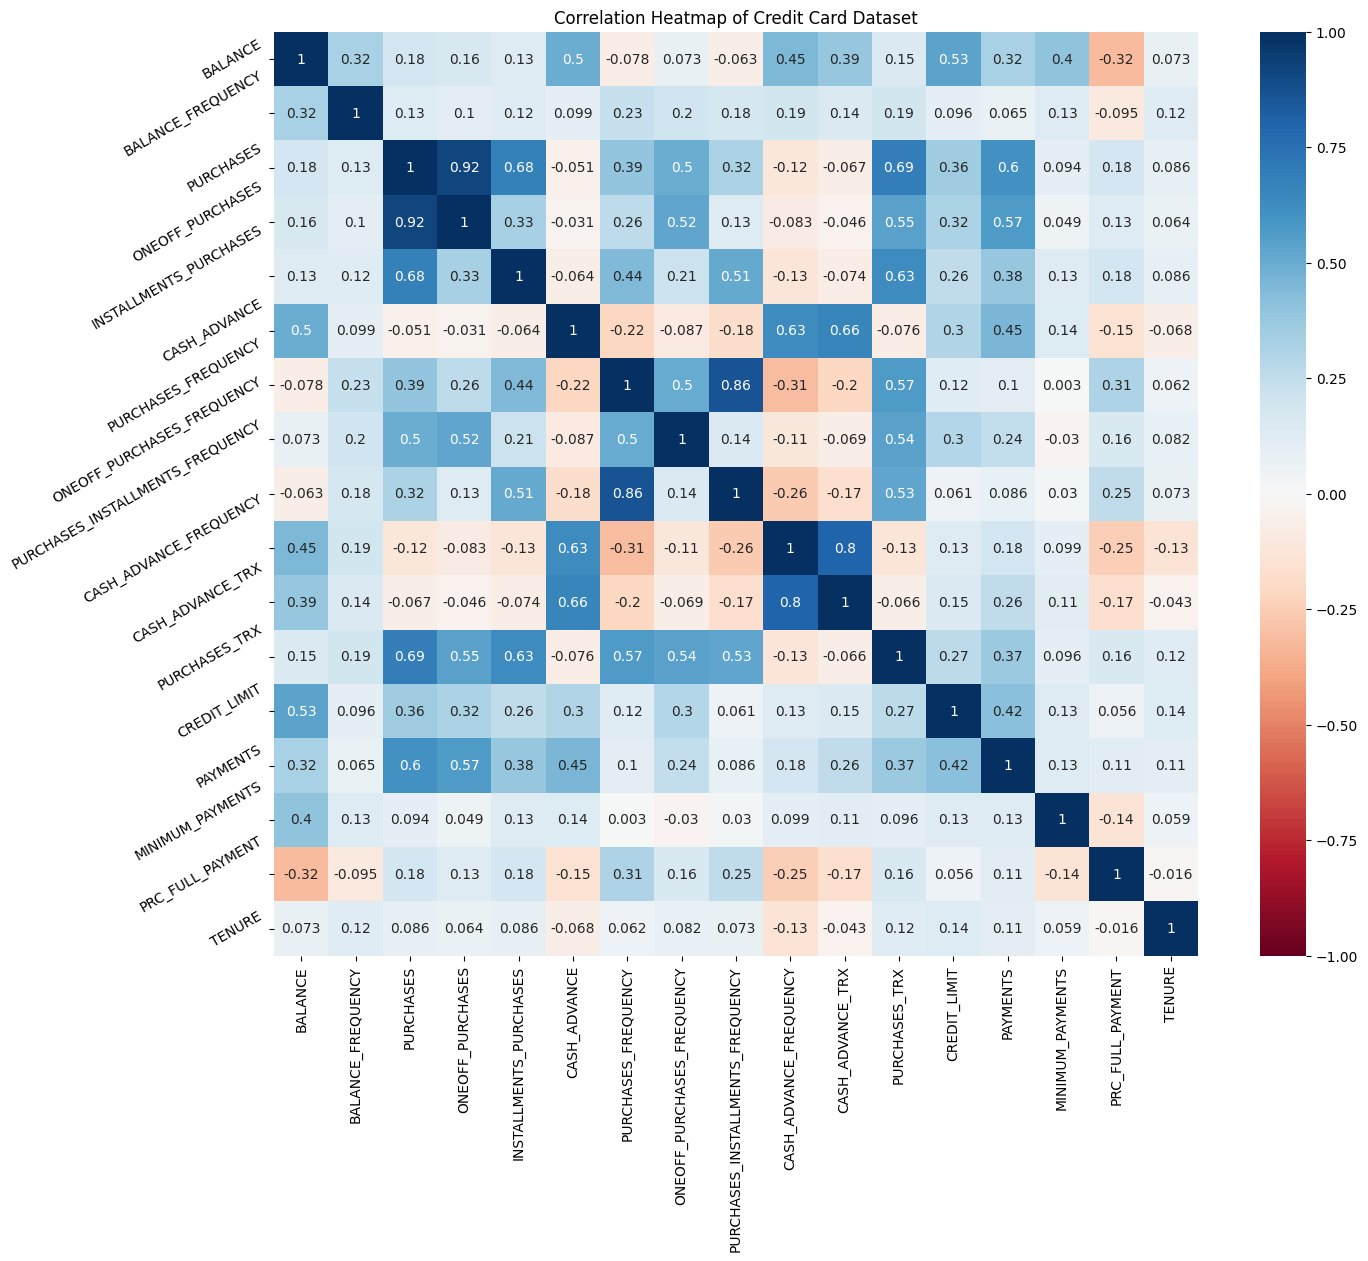

In [ ]:
correlation = df.corr()
plt.figure(figsize=(16,12))
plt.title('Correlation Heatmap of Credit Card Dataset')
ax = sns.heatmap(correlation,square=True, annot=True, vmax=1, vmin=-1, cmap='RdBu')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_yticklabels(ax.get_yticklabels(), rotation=30)
plt.show()

Dalam heatmap tersebut, terlihat bahwa terdapat kolerasi yang cukup tinggi antar kolom diantaranya :

* Kolom INSTALLMENT PURCHASES dengan kolom PURCHASES dengan korelasi 0.92
* Kolom PURCHASES FREQUENCY dengan kolom CASH ADVANCE FREQUENCY dengan korelasi 0.86
* Kolom CASH ADVANCE FREQUENCY dengan kolom CASH ADVANCE TRX dengan korelasi 0.8

Dalam heatmap tersebut, juga terlihat bahwa terdapat kolerasi yang cukup rendah antar kolom diantaranya :

* Kolom BALANCE dengan kolom PRC FULL PAYMENT dengan korelasi -0.32
* Kolom PURCHASES FREQUENCY dengan kolom CASH ADVANCE FREQUENCY dengan korelasi -0.31
* Kolom PURCHASES INSTALLMENTS FREQUENCY dengan kolom CASH ADVANCE FREQUENCY dengan korelasi -0.26

# Pre Prosessing

Melihat total nilai-nilai yang hilang (NaN) dalam setiap kolom DataFrame "df".

In [ ]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [ ]:
df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].mean(),inplace=True)
df.dropna(subset=['CREDIT_LIMIT'], inplace=True)
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


mengisi nilai-nilai yang hilang dalam kolom 'MINIMUM_PAYMENTS' dengan nilai rata-rata kolom tersebut, dan menghapus baris-baris yang memiliki nilai hilang dalam kolom 'CREDIT_LIMIT' dari DataFrame 'df'. Kemudian, kita menampilkan lima baris pertama dari DataFrame yang sudah dimodifikasi.

Melihat total nilai-nilai yang hilang (NaN) dalam setiap kolom DataFrame "df".

In [ ]:
df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

 Melihat total baris yang diduplikasi dalam DataFrame 'df'.

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.drop('CUST_ID', axis=1, inplace=True)
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


menghapus kolom 'CUST_ID' dari DataFrame 'df' menggunakan fungsi drop() dengan menggunakan argumen axis=1 yang menunjukkan bahwa kita ingin menghapus kolom. Setelah kolom dihapus, kita menampilkan lima baris pertama dari DataFrame yang sudah dimodifikasi.

In [ ]:
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

In [ ]:
df_scaled.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.732054,-0.249881,-0.424934,-0.356957,-0.349114,-0.466805,-0.806649,-0.678716,-0.707409,-0.675294,-0.476083,-0.511381,-0.960380,-0.529026,-0.310993,-0.525588,0.360541
1,0.786858,0.134049,-0.469584,-0.356957,-0.454607,2.605438,-1.221928,-0.678716,-0.917090,0.573949,0.110032,-0.591841,0.688601,0.818546,0.089265,0.234159,0.360541
2,0.447041,0.517980,-0.107716,0.108843,-0.454607,-0.466805,1.269742,2.673295,-0.917090,-0.675294,-0.476083,-0.109082,0.826016,-0.383857,-0.101699,-0.525588,0.360541
3,0.049015,-1.017743,0.231995,0.546123,-0.454607,-0.368678,-1.014290,-0.399383,-0.917090,-0.258882,-0.329554,-0.551611,0.826016,-0.598733,-0.000041,-0.525588,0.360541
4,-0.358849,0.517980,-0.462095,-0.347317,-0.454607,-0.466805,-1.014290,-0.399383,-0.917090,-0.675294,-0.476083,-0.551611,-0.905414,-0.364421,-0.265819,-0.525588,0.360541


In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.95)
X_red = pca.fit_transform(df_scaled)

Objek PCA dibuat dengan menentukan jumlah komponen yang ingin dipertahankan, dalam hal ini 95% variabilitas. Kemudian, metode fit_transform() digunakan untuk mengubah dataset yang telah di-scale (df_scaled) menjadi dataset baru (X_red) yang terdiri dari komponen-komponen utama yang telah dipilih berdasarkan nilai komponen yang telah ditentukan sebelumnya.

#### Melihat Jumlah Cluster yang Optimal dengan menggunakan Elbow Method

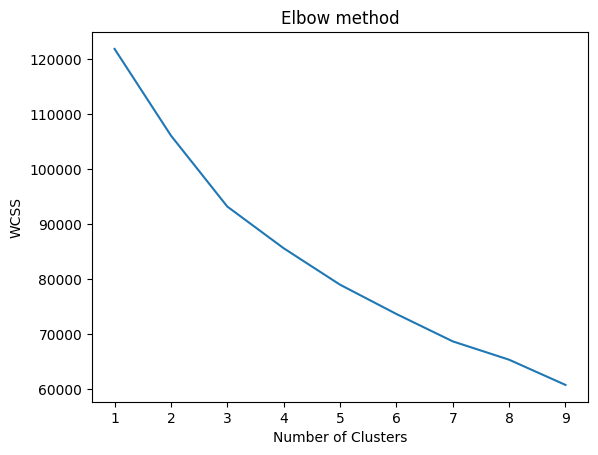

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

kmeans_models = [KMeans(n_clusters=k, random_state=23).fit(X_red) for k in range (2, 11)]
innertia = [model.inertia_ for model in kmeans_models]

plt.plot(range(1, 10), innertia)
plt.title('Elbow method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

Nilai inertia terhadap wcss menunjukkan bahwa k kluster yang dapat dipilih yakni 3 kluster.

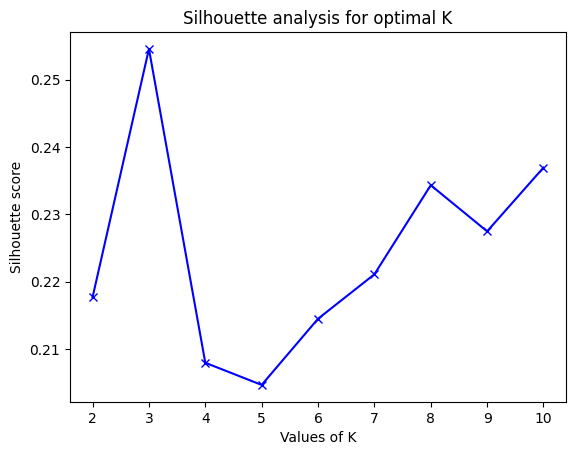

In [ ]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

range_n_clusters = np.arange(2, 11)
silhouette_avg = []

for num_clusters in range_n_clusters:
    # Initialize k-means
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(X_red)
    cluster_labels = kmeans.labels_

    # Silhouette score
    silhouette_avg.append(silhouette_score(X_red, cluster_labels))

plt.plot(range_n_clusters, silhouette_avg, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Silhouette score')
plt.title('Silhouette analysis for optimal K')
plt.show()


dengan menggunakan pendekatan silhouette menggunakan rata-rata nilai cluster untuk menduga nilai k optimum. Semakin tinggi nilai rata-ratanya maka akan semakin baik clusternya. Berdasarkan grafik silhouette yang terbentuk, diperoleh banyak cluster optimal seanyak 3.

## Pendefinisian Model
Bagian ini berisi cell untuk mendefinisikan model sampai kompilasi model.

#### K-Means
Metode klasterisasi pertama yang digunakan yakni K-Means

In [ ]:
kms = KMeans(n_clusters=3, random_state=42)

### Model Training & Prediction
Cell pada bagian ini hanya berisi code untuk melatih model dan output yang dihasilkan

In [ ]:
model_km = kms.fit(X_red)

#### Model Predicition

In [ ]:
df_scaled['Cluster KM'] = kms.fit_predict(X_red)

In [ ]:
df_scaled['Cluster KM']

0       0
1       1
2       0
3       0
4       0
       ..
8944    0
8945    0
8946    0
8947    0
8948    0
Name: Cluster KM, Length: 8949, dtype: int32

In [ ]:
df['Cluster KM'] = kms.fit_predict(X_red)

### Evaluasi Model
Pada bagian ini, dilakukan evaluasi model yang harus menunjukkan bagaimana performa model berdasarkan metrics yang dipilih.

In [ ]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

sil_km = silhouette_score(X_red, df_scaled['Cluster KM'])
ch_km = calinski_harabasz_score(X_red, df_scaled['Cluster KM'])
db_km = davies_bouldin_score(X_red, df_scaled['Cluster KM'])

print('sil_km', sil_km)
print('ch_km' ,ch_km)
print('db_km',db_km)

sil_km 0.25360324254934946
ch_km 1691.293549052441
db_km 1.5455414809948864


Siluet Compare

In [ ]:
model_selection = pd.DataFrame({'KMeans': [sil_km, ch_km, db_km]},
                               index = ['Silhouette Score', 'Calinski Harabasz score', 'Davies-Bouldin score'])
model_selection

,KMeans
Silhouette Score,0.253603
Calinski Harabasz score,1691.293549
Davies-Bouldin score,1.545541


terdapat 3 score yang di tampilkan, dan definisinya sebagai berikut :
 1. Silhoutte Score

    Silhouette Score digunakan untuk melihat kualitas dan kekuatan cluster, seberapa baik atau buruknya suatu obyek ditempatkan dalam suatu cluster. Metode ini merupakan gabungan dari metode separasi dan kohesi
 2. Calinski Harabasz Score

    Calinski Harabasz Score dapat digunakan untuk mengevaluasi model, di mana skor Calinski-Harabasz yang lebih tinggi berkaitan dengan model dengan kelompok yang terdefinisi lebih baik.
 3. Davies - Bouldin score

    adalah metrik untuk mengevaluasi algoritma pengelompokan. Ini adalah skema evaluasi internal, di mana validasi seberapa baik pengelompokan telah dilakukan menggunakan jumlah dan fitur yang melekat pada dataset.

#### Analisis :
- Calinski-Harabasz dapat memprediksi jumlah klaster optimal lebih baik dibandingkan Melalui evaluasi model yang telah dilakukan, diperoleh 3 score yang hasilnya baik tidak adanya hasil yang sampai negatif dan evaluasi model ini menggunakan metode KMeans Clustering

Text(0.5, 1.0, 'BALANCE VS PURCHASES')

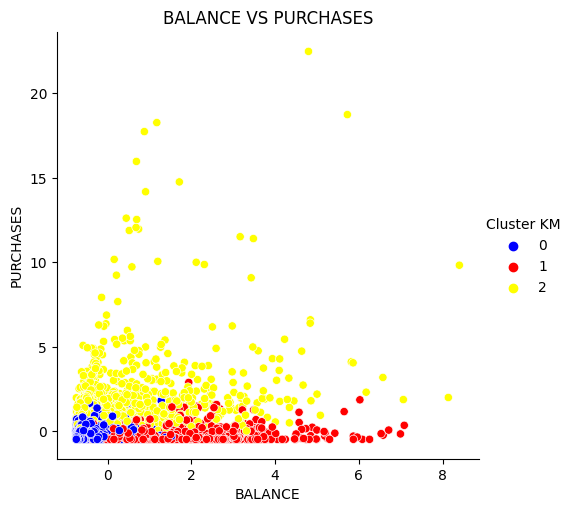

In [ ]:
import seaborn as sns
sns.relplot(x='BALANCE', y='PURCHASES',
            data=df_scaled, hue='Cluster KM', palette=['blue','red','yellow','green'])

plt.title('BALANCE VS PURCHASES')

### Analisis
dari perbandingan Balance Vs Purchases diperoleh bahwa
- klaster 0 merupakan customer yang banyak melakukan pembelian juga saldo tinggi.
- klaster 1 merupakan customer yang memiliki saldo tinggi namun tidak banyak melakukan pembelian.
- Klaster 2  merupakan orang yang tidak banyak memiliki saldo dan tidak banyak melakukan pembelian juga.

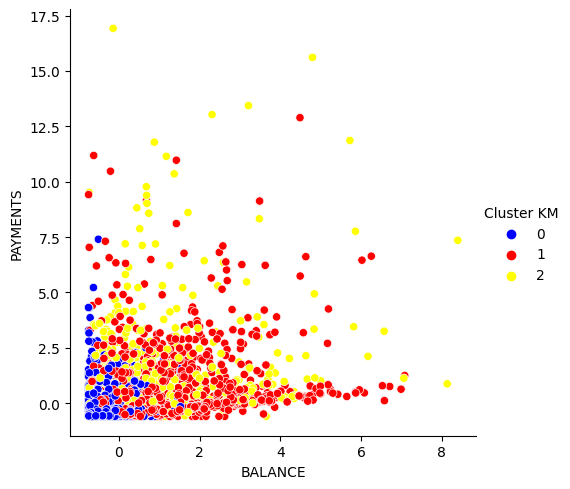

In [ ]:
sns.relplot(x='BALANCE', y='PAYMENTS',
            data=df_scaled, hue='Cluster KM', palette=['blue','red','yellow','green'])

### Analisis
dari perbandingan Balance dan Payments diperoleh bahwa
- klaster 0 merupakan customer dengan saldo tinggi yang banyak melakukan pembayaran.
- klaster 2 merupakan customer yang tidak memiliki banyak saldo namun melakukan pembayaran.
- Klaster 1  merupakan customer yang tidak banyak saldo dan tidak banyak melakukan pembayaran

## Kesimpulan
- metode KMeans Clustering menunjukkan kebaikan model yang relatif baik.
- Clustering dilakukan menggunakan Kmeans
- Dengan menggunakan metode Elbow, diperoleh jumlah klaster optimal, yaitu 3 klaster
- Terdapat 3 klaster optimal dengan ciri-ciri yakni
    - klaster 0 merupakan customer dengan saldo dan pengeluaran yang banyak.
    - klaster 1 merupakan customer dengan saldo banyak namun pengeluarannya lebih sedikit dari klaster 0.
    - klaster 2 memiliki saldo yang lebih sedikit dari klaster 0 dan 1 dan memiliki pengeluaran yang tidak banyak juga.